In [235]:
#1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("titanic-passengers.csv", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [236]:
df.Age = df.Age.fillna(df.Age.median())
num_survived = {'Survived':{'No':0, 'Yes':1}}
df.replace(num_survived, inplace = True)
num_sex = {'Sex':{'male':0, 'female':1}}
df.replace(num_sex, inplace = True)    
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,NaN,S


In [237]:
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna('S', inplace = True)
df.drop('PassengerId', axis=1, inplace=True)
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.')
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Mrs','Officer','Officer','Royalty','Royalty','Royalty','Officer','Officer','Officer','Royalty','Royalty'],inplace=True)
df.drop('Name', axis=1, inplace=True)
Embarked_one_hot = pd.get_dummies(df['Embarked'])
df = df.join(Embarked_one_hot)
df.drop('Embarked', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
for dataset in [df]:
    dataset['Familysize'] = dataset['SibSp'] + dataset['Parch'] +1
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Title       891 non-null    object 
 6   C           891 non-null    uint8  
 7   Q           891 non-null    uint8  
 8   S           891 non-null    uint8  
 9   Familysize  891 non-null    int64  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 51.5+ KB


In [238]:
Title_one_hot = pd.get_dummies(df['Title'])
df = df.join(Title_one_hot)
df.drop('Title', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Familysize,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,2,0,28.0,13.0000,0,0,1,1,0,0,1,0,0,0
1,0,3,0,25.0,7.6500,0,0,1,1,0,0,1,0,0,0
2,0,3,0,20.0,7.8542,0,0,1,1,0,0,1,0,0,0
3,0,3,1,29.0,21.0750,0,0,1,5,0,0,0,1,0,0
4,0,1,0,31.0,52.0000,0,0,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,1,0,0,2,0,0,0,1,0,0
887,0,3,0,22.0,7.2292,1,0,0,1,0,0,1,0,0,0
888,0,3,1,30.0,8.6625,0,0,1,1,0,1,0,0,0,0
889,0,3,0,28.0,7.8958,0,0,1,1,0,0,1,0,0,0


In [239]:
df.isnull().sum().sum()

0

In [240]:
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Familysize,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,2,0,28.0,13.0000,0,0,1,1,0,0,1,0,0,0
1,0,3,0,25.0,7.6500,0,0,1,1,0,0,1,0,0,0
2,0,3,0,20.0,7.8542,0,0,1,1,0,0,1,0,0,0
3,0,3,1,29.0,21.0750,0,0,1,5,0,0,0,1,0,0
4,0,1,0,31.0,52.0000,0,0,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,1,0,0,2,0,0,0,1,0,0
887,0,3,0,22.0,7.2292,1,0,0,1,0,0,1,0,0,0
888,0,3,1,30.0,8.6625,0,0,1,1,0,1,0,0,0,0
889,0,3,0,28.0,7.8958,0,0,1,1,0,0,1,0,0,0


In [241]:
#2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import metrics 
x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]

y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8156424581005587


In [242]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_2 <= 27.50
|   |   |   |--- feature_2 <= 24.50
|   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  17.50
|   |   |   |   |   |--- feature_3 <= 71.28
|   |   |   |   |   |   |--- feature_3 <= 58.23
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  58.23
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  71.28
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  24.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  27.50
|   |   |   |--- feature_3 <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  26.14
|   |   |   |   |--- feature_3 <= 26.47
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  26.47
|   |   |   |   |   |--- feature_2 <= 60.50
|   |   |   |   |   |   |--- feature_3 <= 37.00
|   |   |   |   |   |   |   |--- feature_3 <= 35.25
|   

score:0.8156424581005587


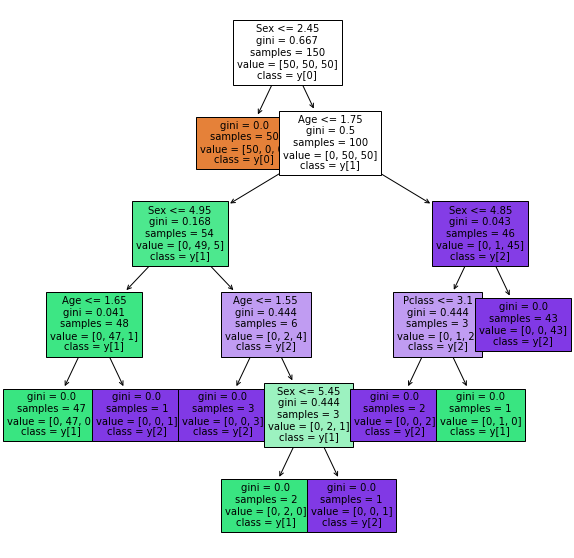

In [243]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()  
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, feature_names= df.columns, class_names = True, fontsize=10, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))

The root branch indicates, that if a passenger's sex qualification is less than 2.45, he will most certainly die. However, if his Sex is higher than 2.45, and his age is below 1.75, than he has a 90% of survival. 

score:0.8156424581005587


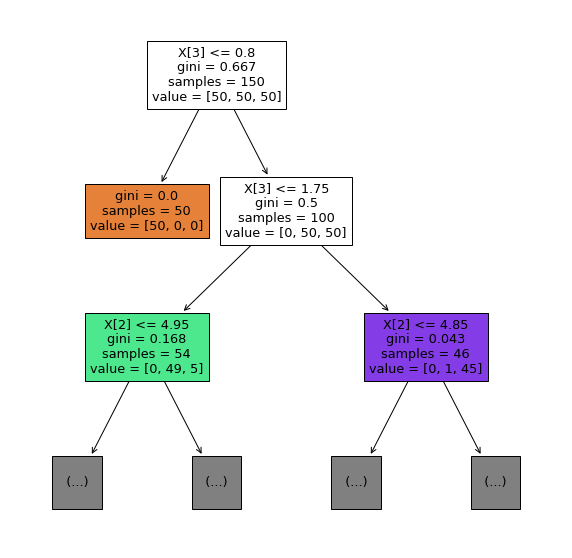

In [244]:
#3. Change the decision tree parameters(change at least two parameters)

x = df[['Pclass', 'Sex', 'Fare', 'C', 'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]

y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf = tree.DecisionTreeClassifier()  
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, max_depth=2, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8156424581005587


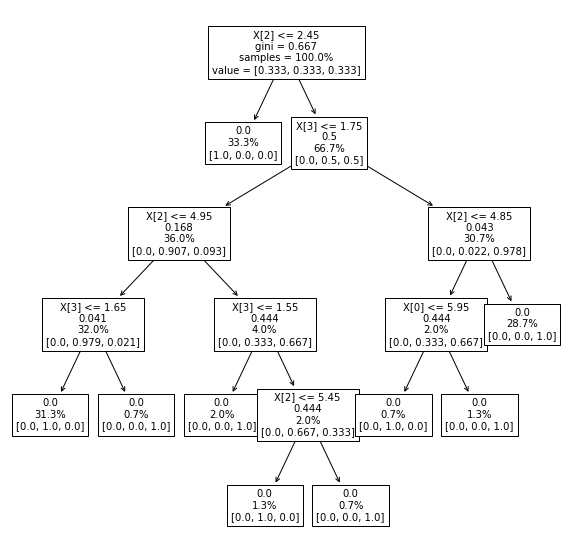

In [245]:
x = df[['Pclass', 'Sex', 'Age', 'Fare']]

y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf = tree.DecisionTreeClassifier()  
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, label='root', proportion=True, fontsize=10)
print("score:{}".format(accuracy_score(y_test, y_pred)))


4. Calculate the new accuracy and compare it with the previous results. 
- score:0.8156424581005587
- score:0.8156424581005587
- score:0.8156424581005587

I changed and removed various features in my decisiontree, but it did not have an affect on the accuracy. 

In [246]:
#5. Use random forest then change the number of estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
iris = datasets.load_iris()

data=pd.DataFrame({
'Pclass': iris.data[:,0],
'Sex': iris.data[:,1],
'Age': iris.data[:,2],
'Fare': iris.data[:,3], 
'C': iris.data[:,3],
'Q': iris.data[:,3], 
'S': iris.data[:,3], 
'Familysize': iris.data[:,3], 
'Master': iris.data[:,3], 
'Miss': iris.data[:,3], 
'Mr': iris.data[:,3], 
'Mrs': iris.data[:,3], 
'Officer': iris.data[:,3], 
'Royalty': iris.data[:,3], 
'Survived': iris.target
})

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]

y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7611940298507462


In [247]:
data=pd.DataFrame({
'Age': iris.data[:,2],
'Fare': iris.data[:,3], 
'C': iris.data[:,3],
'Q': iris.data[:,3], 
'Master': iris.data[:,3], 
'Miss': iris.data[:,3], 
'Officer': iris.data[:,3], 
'Royalty': iris.data[:,3], 
'Survived': iris.target
})

x = df[['Age', 'Fare', 'C', 'Q', 'Master', 'Miss', 'Officer', 'Royalty']]

y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7052238805970149


In [248]:
data=pd.DataFrame({
'Pclass': iris.data[:,0],
'Age': iris.data[:,2],
'C': iris.data[:,3],
'S': iris.data[:,3], 
'Master': iris.data[:,3], 
'Mr': iris.data[:,3],  
'Officer': iris.data[:,3], 
'Survived': iris.target
})

x = df[['Pclass', 'Age', 'C', 'S', 'Master', 'Mr', 'Officer']]

y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8022388059701493


In [249]:
data=pd.DataFrame({
'Master': iris.data[:,3], 
'Miss': iris.data[:,3], 
'Mr': iris.data[:,3], 
'Mrs': iris.data[:,3], 
'Officer': iris.data[:,3], 
'Royalty': iris.data[:,3], 
'Survived': iris.target
})

x = df[['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]

y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7947761194029851


In [234]:
data=pd.DataFrame({
'Pclass': iris.data[:,0],
'Sex': iris.data[:,1],
'Age': iris.data[:,2],
'Fare': iris.data[:,3], 
'Survived': iris.target
})

x = df[['Pclass', 'Sex', 'Age', 'Fare']]

y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8134328358208955


6. Calculate the new accuracy and compare it with the previous result.
- Accuracy: 0.7611940298507462
- Accuracy: 0.7052238805970149
- Accuracy: 0.8022388059701493
- Accuracy: 0.7947761194029851
- Accuracy: 0.8134328358208955
The removal of estimators has a significant influence on the accuracy of my random forest. In some cases it positively improves it, like the 3rd and 5th result, while in the in others it negatively affects it (the 2nd and 4th result). 